In [2]:
from email.contentmanager import raw_data_manager
from pydoc import classname
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from turtle import shape
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from toolbox_02450 import feature_selector_lr, bmplot, rlr_validate, train_neural_net

filename = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(filename)
raw_data = df.values

cols = range(0, 13)

X = raw_data[:, cols]

attribute_names = np.asarray(df.columns[cols])
attribute_dic = dict(zip(attribute_names, range(len(attribute_names))))

# Our class labels is DEATH 
classLabels = raw_data[:, -1]
classNames = sorted(set(classLabels))
classDic = dict(zip([0,1], range(2)))
y = X[:,-1]

N = len(y)
M = len(attribute_names)
C = len(classNames)

In [3]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
features = ['platelets', 'serum_creatinine', 'serum_sodium','creatinine_phosphokinase']
objective = 'age'
x_train,x_test,y_train,y_test = train_test_split(df[features],df[objective],test_size=0.9,random_state=24)

def normalize(x):
    return (x.mean()-x)/x.std()

norm = ['platelets', 'serum_creatinine', 'serum_sodium','creatinine_phosphokinase']
x_train[norm]=normalize(x_train[norm])
x_test[norm]=normalize(x_test[norm])

Text(0, 0.5, 'Estimate')

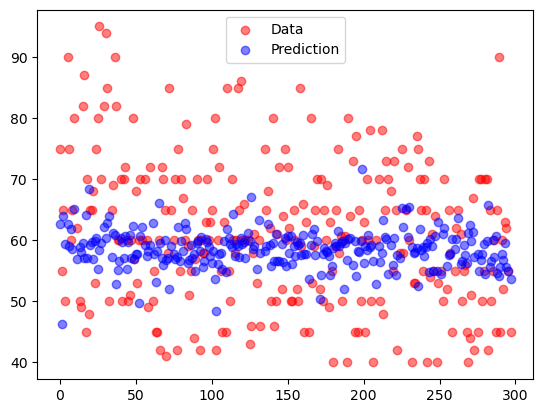

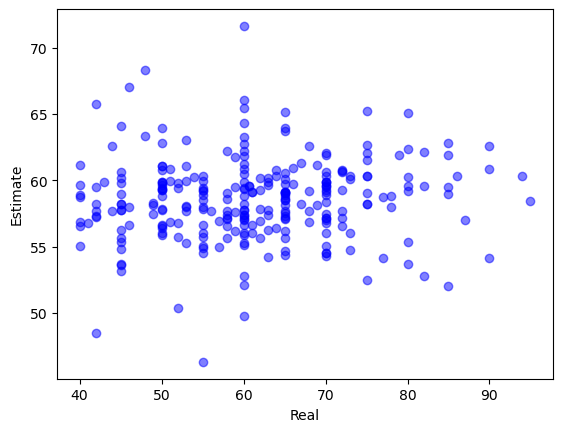

In [5]:

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

plt.scatter(y_test.index,y_test,c = 'red',alpha = 0.5)

plt.scatter(y_test.index,y_pred,c = 'blue',alpha = 0.5)

plt.legend(['Data','Prediction'])

plt.figure()

plt.scatter(y_test,y_pred,c = 'blue',alpha = 0.5)
plt.xlabel('Real')
plt.ylabel('Estimate')

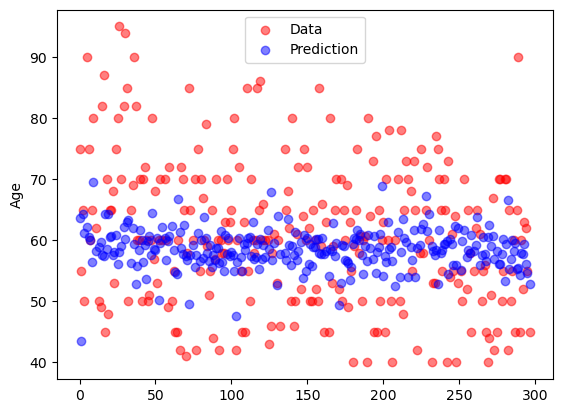

Text(0, 0.5, 'Estimate')

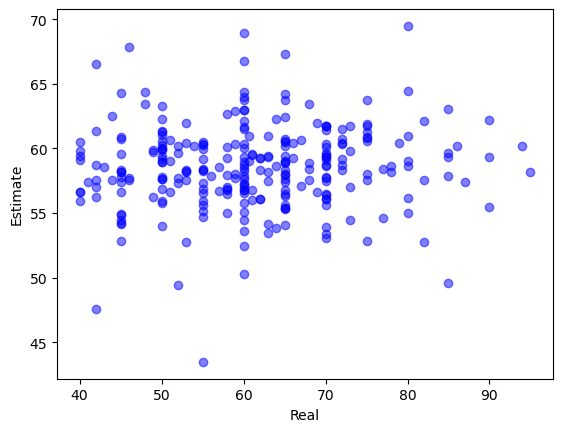

In [6]:
features = ['platelets', 'serum_creatinine', 'serum_sodium','creatinine_phosphokinase','ejection_fraction']
objective = 'age'
x_train,x_test,y_train,y_test = train_test_split(df[features],df[objective],test_size=0.9,random_state=24)

def normalize(x):
    return (x.mean()-x)/x.std()

norm = ['platelets', 'serum_creatinine', 'serum_sodium','creatinine_phosphokinase']
x_train[norm]=normalize(x_train[norm])
x_test[norm]=normalize(x_test[norm])

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)



plt.scatter(y_test.index,y_test,c = 'red',alpha = 0.5)

plt.scatter(y_test.index,y_pred,c = 'blue',alpha = 0.5)

plt.legend(['Data','Prediction'])
plt.ylabel('Age')
plt.show()


plt.figure()

plt.scatter(y_test,y_pred,c = 'blue',alpha = 0.5, )
plt.xlabel('Real')
plt.ylabel('Estimate')


array([[125,  10],
       [ 23,  40]], dtype=int64)

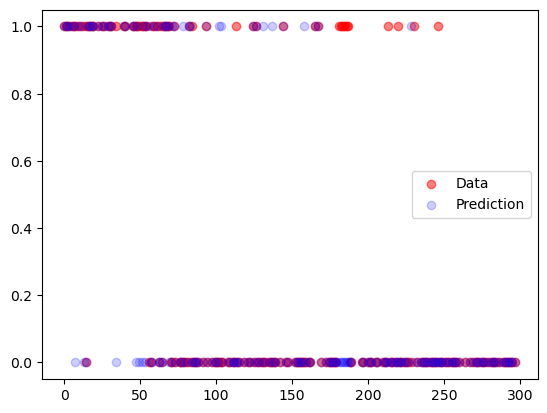

In [7]:

features = ['age', 'anaemia', 'creatinine_phosphokinase',
       'diabetes', 'ejection_fraction', 'high_blood_pressure',
       'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking',
       'time']
objective = 'DEATH_EVENT'
x_train,x_test,y_train,y_test = train_test_split(df[features],df[objective],test_size=0.66,random_state=24)

def normalize(x):
    return (x.mean()-x)/x.std()

norm = ['age','creatinine_phosphokinase'
       , 'ejection_fraction',
       'platelets', 'serum_creatinine', 'serum_sodium',
       'time']
x_train[norm]=normalize(x_train[norm])
x_test[norm]=normalize(x_test[norm])

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred = (y_pred>0.5)
y_pred = 1*y_pred


plt.scatter(y_test.index,y_test,c = 'red',alpha = 0.5)

plt.scatter(y_test.index,y_pred,c = 'blue',alpha = 0.2)

plt.legend(['Data','Prediction'])

confusion_matrix(y_test,y_pred)

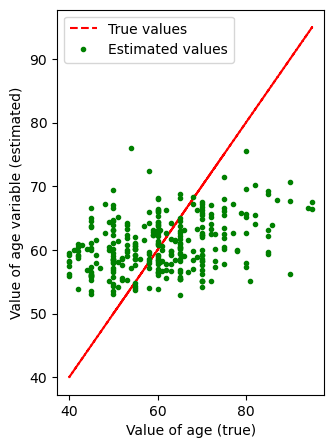

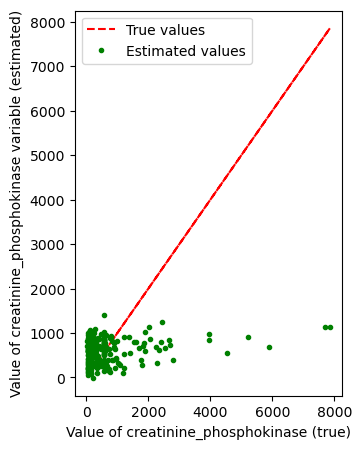

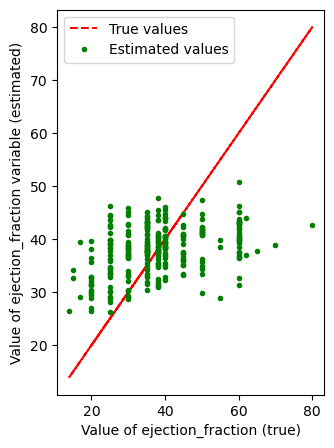

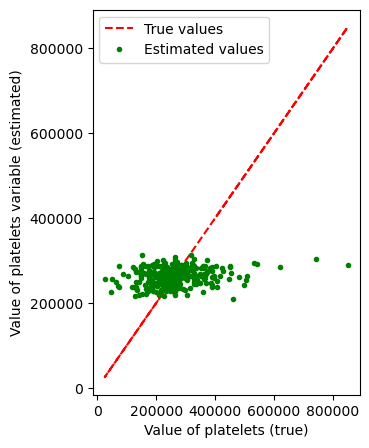

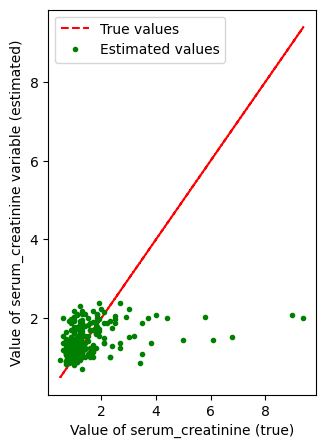

In [8]:
from scipy import stats

features = ['age', 'creatinine_phosphokinase',
       'ejection_fraction',
       'platelets', 'serum_creatinine']
for i in range(len(features)):
    attr_col = list(df.columns).index(features[i])
    cols = list(range(0, attr_col)) + list(range(attr_col + 1, len(df.columns)))

    X = raw_data[:, cols]
    y = raw_data[:, attr_col] # the 'oldpeak' column
    attributeNames = list(df.columns[cols])

    N, M = X.shape
    
    X = stats.zscore(X);

    # Fit ordinary least squares regression model    
    model = LinearRegression()
    model.fit(X,y)

    # Predict thalach
    y_est = model.predict(X)
    residual = y_est-y
    plt.figure(figsize=(20,5))
    plt.subplot(1, 5, i+1)
    plt.plot(y, y, '--r')
    plt.plot(y, y_est, '.g')
    plt.xlabel('Value of {0} (true)'.format(features[i])); plt.ylabel('Value of {0} variable (estimated)'.format(features[i]))
    plt.legend(['True values', 'Estimated values'], loc = 2);